In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb

데이터 불러오기

In [2]:
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

직접 원핫인코딩 하기

In [4]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [5]:
x_train.shape

(25000, 10000)

모델 구성하기

In [6]:
from tensorflow.keras import models, layers, Sequential

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# model.summary()

모델 컴파일 하기

In [7]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

validation set 설정

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

훈련

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5010 - accuracy: 0.7875 - val_loss: 0.3789 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2969 - accuracy: 0.9047 - val_loss: 0.3044 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2234 - accuracy: 0.9265 - val_loss: 0.2807 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1747 - accuracy: 0.9445 - val_loss: 0.2869 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1468 - accuracy: 0.9517 - val_loss: 0.2806 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1200 - accuracy: 0.9629 - val_loss: 0.2962 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1008 - accuracy: 0.9701 - val_loss: 0.3287 - val_accuracy: 0.8758
Epoch 8/20
30

결과 시각화

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 과적합 방지를 위해 Dropout(0.5)를 추가해서 학습

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

dropout_history = model.fit(x_train,
                   y_train,
                   epochs = 20,
                   batch_size = 512,
                    validation_data = (x_val, y_val))


Epoch 1/20
49/49 [==============================] - 1s 23ms/step - loss: 0.6000 - accuracy: 0.6767 - val_loss: 0.4349 - val_accuracy: 0.8807
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4470 - accuracy: 0.8129 - val_loss: 0.2864 - val_accuracy: 0.9125
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3539 - accuracy: 0.8662 - val_loss: 0.2217 - val_accuracy: 0.9304
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2971 - accuracy: 0.8936 - val_loss: 0.1875 - val_accuracy: 0.9379
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2578 - accuracy: 0.9111 - val_loss: 0.1557 - val_accuracy: 0.9494
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2259 - accuracy: 0.9220 - val_loss: 0.1337 - val_accuracy: 0.9552
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2071 - accuracy: 0.9307 - val_loss: 0.1184 - val_accuracy: 0.9642
Epoch 8/20
49

### 드롭아웃이 모델에 끼치는 영향

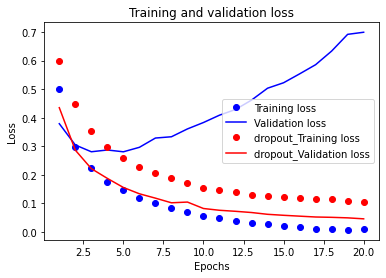

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

dropout_history_dict = dropout_history.history
dropout_loss = dropout_history_dict['loss']
dropout_val_loss = dropout_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')

plt.plot(epochs, dropout_loss, 'ro', label = 'dropout_Training loss')
plt.plot(epochs, dropout_val_loss, 'r', label = 'dropout_Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

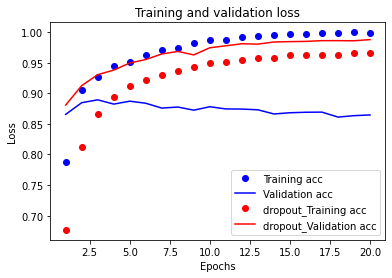

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

dropout_history_dict = dropout_history.history
dropout_acc = dropout_history_dict['accuracy']
dropout_val_acc = dropout_history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')

plt.plot(epochs, dropout_acc, 'ro', label = 'dropout_Training acc')
plt.plot(epochs, dropout_val_acc, 'r', label = 'dropout_Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()